In [1]:
import matplotlib

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:

date1='realfast11jjem2sh'
date2='realfast19jjem2st'

params=4
istart=1
ivalues=20

rbtoeq=np.zeros(ivalues)
ubtoeq=np.zeros(ivalues)
reqtob=np.zeros(ivalues)
ueqtob=np.zeros(ivalues)

for k2 in range(0,ivalues):
    x=[]
    ratefile = open('/home/richard/mastergit/pythonplots/arrhenius_analytics/param%s%d.txt' %('new'+date1+'new'+date2,k2),'r')
    for k4 in ratefile:
        row=k4.split()
        x.append(float(row[0]))
    ax=np.array(x)
    rbtoeq[k2]=x[0]
    ubtoeq[k2]=x[1]
    reqtob[k2]=x[2]
    ueqtob[k2]=x[3]

In [3]:
def r(r0,U,D):
	return r0*np.exp(-U/D)
def deff(rp,up,rm,um,v,D):
	return (v**2*r(rp,up,D)*r(rm,um,D))/((r(rp,up,D)+r(rm,um,D))**3)

In [4]:
file=open('/home/richard/mastergit/NetBeansProjects/detmodel/countI9a.txt',"r")
col,colx=[],[]
for k in file:
    row=k.split()
    colx.append(float(row[0]))
    col.append(float(row[1]))
cola=np.array(col)
colxa=np.array(colx)

In [5]:
N=50000000
dt=0.0005
T=N*dt

In [6]:
colorv=['y','g','b','r','c']
pv=np.arange(0,ivalues)

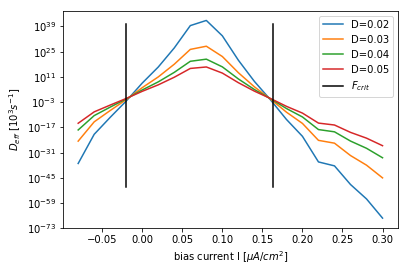

In [9]:
vec=np.linspace(2,5,num=4,endpoint=True)
l=len(vec)
D=0.01
plt.figure()
plt.xlabel('bias current I $[\mu A/cm^2]$')
plt.ylabel('$D_{eff}$ $[10^3s^{-1}]$')
for n in range(0,l):
	plt.plot((pv-4)*0.02,deff(rbtoeq[pv],ubtoeq[pv],reqtob[pv],ueqtob[pv],cola[2*pv+12]/T,D*vec[n]),label='D=%.2f'%(D*vec[n]))

plt.plot([0.163, 0.163], [10**(-50), 10**(40)], color='black', linestyle='-')
plt.plot([-0.02, -0.02], [10**(-50),10**40], color='black', linestyle='-',label='$F_{crit}$')
plt.legend()
plt.yscale('log')

In [10]:
vvalues=51
istepv=0.01
dvdi=np.zeros(vvalues-2)
for z in range(0,vvalues-2):
    dvdi[z]=(cola[z+2]-cola[z])/(2*istepv)
dvdipl=np.zeros(ivalues-2)
for z in range(0,ivalues-2):
    dvdipl[z]=dvdi[13+2*z]
vpl=np.zeros(ivalues-2)
for z in range(0,ivalues-2):
    vpl[z]=cola[12+2*z]

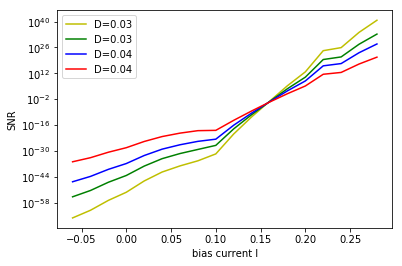

In [17]:
#vecs=np.linspace(1,5,num=5,endpoint=True)
vecs=np.array([5,6,7,9])
ls=len(vecs)
Ds=0.005
Dsv=Ds*vecs
istep=0.02
rp=np.zeros((ls,ivalues-2))
rm=np.zeros((ls,ivalues-2))
for d in range(0,ls):
    for z in range(0,ivalues-2):
        rp[d][z]=r(rbtoeq[z+1],ubtoeq[z+1],Dsv[d])
        rm[d][z]=r(reqtob[z+1],ueqtob[z+1],Dsv[d])
dupdi=np.zeros(ivalues-2)
dumdi=np.zeros(ivalues-2)
for z in range(0,ivalues-2):
    dupdi[z]=(ubtoeq[z+2]-ubtoeq[z])/(2*istep)
    dumdi[z]=(ueqtob[z+2]-ueqtob[z])/(2*istep)
r0m=np.zeros(ivalues-2)
r0p=np.zeros(ivalues-2)
dr0mdi=np.zeros(ivalues-2)
dr0pdi=np.zeros(ivalues-2)
for z in range(0,ivalues-2):
    r0m[z]=reqtob[z+1]
    r0p[z]=rbtoeq[z+1]
    dr0mdi[z]=(reqtob[z+2]-reqtob[z])/(2*istep)
    dr0pdi[z]=(rbtoeq[z+2]-rbtoeq[z])/(2*istep)
pvc=np.linspace(-0.06,0.28,num=ivalues-2,endpoint=True)
plt.figure()
plt.xlabel('bias current I')
plt.ylabel('SNR')
colorv=['y','g','b','r','c']
for n in range(0,l):
#    plt.plot(xs,(SNR[n,:]-1)/scale[n,:],colorv[n]+'o')
#    plt.plot(pvc,snr(rp[n,:],rm[n,:],vpl/T,drdi[n,:])/8,colorv[n],label='D=%.2f'%Dsv[n])
#    plt.plot(pvc,snru(rp[n,:],rm[n,:],vpl,dvdipl,dupdi,dumdi,Dsv[n])/8,colorv[n],label='D=%.2f'%Dsv[n])
    plt.plot(pvc,snrtot(rp[n,:],rm[n,:],vpl,dvdipl,dupdi,dumdi,Dsv[n],r0p,dr0pdi,r0m,dr0mdi)/8,colorv[n],label='D=%.2f'%Dsv[n])
plt.yscale('log')
plt.legend()
#plt.xlim(0.15,0.2)
#plt.ylim(10**(-7),0.1)

In [11]:
def deffrate(v,rp,rm):
    return (v**2*rp*rm)/((rp+rm)**3)
def snr(rp,rm,v,drdi):
    return (drdi**2)/deffrate(v,rp,rm)

In [12]:
def snru(rp,rm,v,dvdi,dupdi,dumdi,D):
    return (rm*(rp+rm)/(v**2*rp))*(v*rp*(dupdi-dumdi)/(D*(rp+rm))+dvdi)**2

In [13]:
def snrtot(rp,rm,v,dvdi,dupdi,dumdi,D,r0p,dr0pdi,r0m,dr0mdi):
    return (rm*(rp+rm)/(v**2*rp))*(v*rp*((-dr0pdi/r0p+dupdi/D)-(-dr0mdi/r0m+dumdi/D))/(rp+rm)+dvdi)**2

In [14]:
date='realfast13aem2n4'

date3='realfast9aem2sh'
D=[25,30]
D1=[35,45]
Dtot=D+D1
l=len(D)+len(D1)

points=1000000
length=500000
ivalues=20
SNR=np.zeros((l,ivalues))
scale=np.zeros((l,ivalues))
ii=0

for c in D:
	for z in range(1,21):
		file=open('/home/richard/outhome/spike%s%d%d.txt' %(date,c,z),"r")
		x,y=[],[]
		for k in file:
			row=k.split()
			x.append(float(row[0]))
			y.append(float(row[1]))
		ax=np.array(x)
		ay=np.array(y)
		param=open('/home/richard/outhome/param%s%d%d.txt' %(date,c,z),"r")
		ll=0
		name,value=[],[]
		for k in param:
			row=k.split()
			lp=len(row)
			if ll<1:
				for jj in range(0,lp):
					name.append(row[jj])
			else:
				for kk in range(0,lp):
					value.append(float(row[kk]))
			ll=ll+1
		dt=value[name.index('dt')]
		N=value[name.index('N')]-value[name.index('Neq')]
		repetitions=value[name.index('repetitions')]
		epsilon=value[name.index('epsilon')]
		omega=value[name.index('omega')]
		T=N*repetitions*dt
		scale[ii][z-1]=epsilon**2*T
		omegaind=round(omega*T)		
		SNR[ii][z-1]=ay[omegaind]/np.mean([ay[omegaind-1],ay[omegaind-2],ay[omegaind+1],ay[omegaind+2],ay[omegaind-3]])
	ii=ii+1

for c1 in D1:
	for z in range(1,21):
		file=open('/home/richard/outhome/spike%s%d%d.txt' %(date3,c1,z),"r")
		x,y=[],[]
		for k in file:
			row=k.split()
			x.append(float(row[0]))
			y.append(float(row[1]))
		ax=np.array(x)
		ay=np.array(y)
		param=open('/home/richard/outhome/param%s%d%d.txt' %(date3,c1,z),"r")
		ll=0
		name,value=[],[]
		for k in param:
			row=k.split()
			lp=len(row)
			if ll<1:
				for jj in range(0,lp):
					name.append(row[jj])
			else:
				for kk in range(0,lp):
					value.append(float(row[kk]))
			ll=ll+1
		dt=value[name.index('dt')]
		N=value[name.index('N')]-value[name.index('Neq')]
		repetitions=value[name.index('repetitions')]
		epsilon=value[name.index('epsilon')]
		omega=value[name.index('omega')]
		T=N*repetitions*dt
		scale[ii][z-1]=epsilon**2*T
		omegaind=round(omega*T)		
		SNR[ii][z-1]=ay[omegaind]/np.mean([ay[omegaind-1],ay[omegaind-2],ay[omegaind+1],ay[omegaind+2],ay[omegaind-3]])
	ii=ii+1
    
xs=np.arange(-0.08,0.32,0.02)

/home/richard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


In [16]:
D1=[25,30]
D2=[35,45]

D=D1+D2
Da=np.array(D)
l1=len(D1)
l2=len(D2)
l=l1+l2
date1='realfast13aem2n4'
date2='realfast9aem2sh'



istart=1
ivalues=20

g=np.zeros((l,ivalues))
xg=np.zeros((l,ivalues))
ii=0

istart1=1
ivalues1=20
for x in D1:
	col1,colx1=[],[]	
	for y in range(istart1,istart1+ivalues1):
		file=open('/home/richard/outhome/g%s%d%d.txt' % (date1,x,y),"r")
		for k in file:
			row=k.split()
			colx1.append(float(row[0]))
			col1.append(float(row[1]))
	colxa1=np.array(colx1)
	cola1=np.array(col1)
	for z in range(0,ivalues1):
		g[ii][z]=cola1[z]
		xg[ii][z]=colxa1[z]
	ii=ii+1

istart2=1
ivalues2=20
for x in D2:
	col2,colx2=[],[]	
	for y in range(istart2,istart2+ivalues2):
		file=open('/home/richard/outhome/g%s%d%d.txt' % (date2,x,y),"r")
		for k in file:
			row=k.split()
			colx2.append(float(row[0]))
			col2.append(float(row[1]))
	colxa2=np.array(colx2)
	cola2=np.array(col2)
	for z in range(0,ivalues2):
		g[ii][z]=cola2[z]
		xg[ii][z]=colxa2[z]
	ii=ii+1


drdi=np.zeros((l,ivalues-2))
rv=np.zeros((l,ivalues-2))
for y in range(0,l):
    for z in range(0,ivalues-2):
        drdi[y][z]=(g[y][z+2]-g[y][z])/(2*istep)
        rv[y][z]=g[y][z+1]
    